## Setting up a DataCube

- Reference: [TUW-GEO/yeoda](https://github.com/TUW-GEO/yeoda/blob/master/docs/notebooks/feature_examples.ipynb)

In [1]:
import os

#get full dir
#from pathlib import Path
#path = Path(__file__)
#print(path)

# get current dir
print(os.getcwd())

C:\Users\carellan\Documents\GitHub\GEO-TUW


In [115]:
import yeoda

from pathlib import Path
from yeoda.datacube import EODataCube
from geopathfinder.folder_naming import build_smarttree
from equi7grid.equi7grid import Equi7Grid

In [116]:
### Setting up a datacube

from geopathfinder.folder_naming import build_smarttree

#eg.  root_path = "/data/Sentinel-1_CSAR/MMEAN_SIG0/"
root_path = "D:\E066N024T6"    #tile covering Sofala, Inhambane, Gaza, AF
folder_hierarchy = []


# regex expressions are supported to select only files matching a certain pattern
# search for images starting with D -> SIG0. Q is quick look
tree = build_smarttree(root_path, folder_hierarchy, register_file_pattern="^[^Q].*.tif")
filepaths = tree.file_register

print(f"{len(filepaths)} files registered:")
print("\n".join(filepaths))

811 files registered:
D:\E066N024T6\sig0\D20160102_163041--_SIG0-----_S1AIWGRDH1VHA_145_A0205_AF500M_E066N024T6.tif
D:\E066N024T6\sig0\D20160102_163041--_SIG0-----_S1AIWGRDH1VVA_145_A0205_AF500M_E066N024T6.tif
D:\E066N024T6\sig0\D20160104_161400--_SIG0-----_S1AIWGRDH1VHA_174_A0205_AF500M_E066N024T6.tif
D:\E066N024T6\sig0\D20160104_161400--_SIG0-----_S1AIWGRDH1VVA_174_A0205_AF500M_E066N024T6.tif
D:\E066N024T6\sig0\D20160105_030819--_SIG0-----_S1AIWGRDH1VVD_006_A0205_AF500M_E066N024T6.tif
D:\E066N024T6\sig0\D20160109_162231--_SIG0-----_S1AIWGRDH1VHA_072_A0205_AF500M_E066N024T6.tif
D:\E066N024T6\sig0\D20160109_162231--_SIG0-----_S1AIWGRDH1VVA_072_A0205_AF500M_E066N024T6.tif
D:\E066N024T6\sig0\D20160114_163040--_SIG0-----_S1AIWGRDH1VHA_145_A0205_AF500M_E066N024T6.tif
D:\E066N024T6\sig0\D20160114_163040--_SIG0-----_S1AIWGRDH1VVA_145_A0205_AF500M_E066N024T6.tif
D:\E066N024T6\sig0\D20160121_162231--_SIG0-----_S1AIWGRDH1VHA_072_A0205_AF500M_E066N024T6.tif
D:\E066N024T6\sig0\D20160121_162231--_

In [117]:
### Define Grid

from equi7grid.equi7grid import Equi7Grid
subgrid = Equi7Grid(500)

# grid operations
print("Tile type:")
print(subgrid.get_tiletype())


Tile type:
T6


In [118]:
### Data Cube of our files :)

from geopathfinder.naming_conventions.sgrt_naming import SgrtFilename
#from geopathfinder.naming_conventions.yeoda_naming import YeodaFilename
from yeoda.datacube import EODataCube

dimensions = ["dtime_1","var_name", "mission_id", "spacecraft_id", "mode_id", "product_type" , "res_class", "pol", "orbit_direction", "relative_orbit", "workflow_id", "grid_name", "band", "tile_name"]

sig0_cube = EODataCube(filepaths=filepaths, dimensions=dimensions, filename_class=SgrtFilename, grid=subgrid,
                       sdim_name="tile_name", tdim_name="dtime_1")
sig0_cube.inventory

,filepath,dtime_1,var_name,mission_id,spacecraft_id,mode_id,product_type,res_class,pol,orbit_direction,relative_orbit,workflow_id,grid_name,tile_name
0,D:\E066N024T6\sig0\D20160102_163041--_SIG0----...,2016-01-02,SIG0,S1,A,IW,GRD,H,VH,A,145,A0205,AF500M,E066N024T6
1,D:\E066N024T6\sig0\D20160102_163041--_SIG0----...,2016-01-02,SIG0,S1,A,IW,GRD,H,VV,A,145,A0205,AF500M,E066N024T6
2,D:\E066N024T6\sig0\D20160104_161400--_SIG0----...,2016-01-04,SIG0,S1,A,IW,GRD,H,VH,A,174,A0205,AF500M,E066N024T6
3,D:\E066N024T6\sig0\D20160104_161400--_SIG0----...,2016-01-04,SIG0,S1,A,IW,GRD,H,VV,A,174,A0205,AF500M,E066N024T6
4,D:\E066N024T6\sig0\D20160105_030819--_SIG0----...,2016-01-05,SIG0,S1,A,IW,GRD,H,VV,D,6,A0205,AF500M,E066N024T6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,D:\E066N024T6\sig0\D20171229_162244--_SIG0----...,2017-12-29,SIG0,S1,A,IW,GRD,H,VV,A,72,A0205,AF500M,E066N024T6
807,D:\E066N024T6\sig0\D20171230_031635--_SIG0----...,2017-12-30,SIG0,S1,A,IW,GRD,H,VH,D,79,A0205,AF500M,E066N024T6
808,D:\E066N024T6\sig0\D20171230_031635--_SIG0----...,2017-12-30,SIG0,S1,A,IW,GRD,H,VV,D,79,A0205,AF500M,E066N024T6
809,D:\E066N024T6\sig0\D20171230_161530--_SIG0----...,2017-12-30,SIG0,S1,B,IW,GRD,H,VH,A,174,A0205,AF500M,E066N024T6


In [119]:
# Renaming dimensions

sig0_cube.rename_dimensions({'tile_name': 'tile'}, inplace=True)
sig0_cube.inventory

,filepath,dtime_1,var_name,mission_id,spacecraft_id,mode_id,product_type,res_class,pol,orbit_direction,relative_orbit,workflow_id,grid_name,tile
0,D:\E066N024T6\sig0\D20160102_163041--_SIG0----...,2016-01-02,SIG0,S1,A,IW,GRD,H,VH,A,145,A0205,AF500M,E066N024T6
1,D:\E066N024T6\sig0\D20160102_163041--_SIG0----...,2016-01-02,SIG0,S1,A,IW,GRD,H,VV,A,145,A0205,AF500M,E066N024T6
2,D:\E066N024T6\sig0\D20160104_161400--_SIG0----...,2016-01-04,SIG0,S1,A,IW,GRD,H,VH,A,174,A0205,AF500M,E066N024T6
3,D:\E066N024T6\sig0\D20160104_161400--_SIG0----...,2016-01-04,SIG0,S1,A,IW,GRD,H,VV,A,174,A0205,AF500M,E066N024T6
4,D:\E066N024T6\sig0\D20160105_030819--_SIG0----...,2016-01-05,SIG0,S1,A,IW,GRD,H,VV,D,6,A0205,AF500M,E066N024T6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,D:\E066N024T6\sig0\D20171229_162244--_SIG0----...,2017-12-29,SIG0,S1,A,IW,GRD,H,VV,A,72,A0205,AF500M,E066N024T6
807,D:\E066N024T6\sig0\D20171230_031635--_SIG0----...,2017-12-30,SIG0,S1,A,IW,GRD,H,VH,D,79,A0205,AF500M,E066N024T6
808,D:\E066N024T6\sig0\D20171230_031635--_SIG0----...,2017-12-30,SIG0,S1,A,IW,GRD,H,VV,D,79,A0205,AF500M,E066N024T6
809,D:\E066N024T6\sig0\D20171230_161530--_SIG0----...,2017-12-30,SIG0,S1,B,IW,GRD,H,VH,A,174,A0205,AF500M,E066N024T6


In [120]:
# Sort by date (from oldest image)

sorted_descending = sig0_cube.sort_by_dimension('dtime_1', ascending=False)
sorted_descending.inventory

,filepath,dtime_1,var_name,mission_id,spacecraft_id,mode_id,product_type,res_class,pol,orbit_direction,relative_orbit,workflow_id,grid_name,tile
810,D:\E066N024T6\sig0\D20171230_161530--_SIG0----...,2017-12-30,SIG0,S1,B,IW,GRD,H,VV,A,174,A0205,AF500M,E066N024T6
809,D:\E066N024T6\sig0\D20171230_161530--_SIG0----...,2017-12-30,SIG0,S1,B,IW,GRD,H,VH,A,174,A0205,AF500M,E066N024T6
808,D:\E066N024T6\sig0\D20171230_031635--_SIG0----...,2017-12-30,SIG0,S1,A,IW,GRD,H,VV,D,79,A0205,AF500M,E066N024T6
807,D:\E066N024T6\sig0\D20171230_031635--_SIG0----...,2017-12-30,SIG0,S1,A,IW,GRD,H,VH,D,79,A0205,AF500M,E066N024T6
806,D:\E066N024T6\sig0\D20171229_162244--_SIG0----...,2017-12-29,SIG0,S1,A,IW,GRD,H,VV,A,72,A0205,AF500M,E066N024T6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,D:\E066N024T6\sig0\D20160105_030819--_SIG0----...,2016-01-05,SIG0,S1,A,IW,GRD,H,VV,D,6,A0205,AF500M,E066N024T6
2,D:\E066N024T6\sig0\D20160104_161400--_SIG0----...,2016-01-04,SIG0,S1,A,IW,GRD,H,VH,A,174,A0205,AF500M,E066N024T6
3,D:\E066N024T6\sig0\D20160104_161400--_SIG0----...,2016-01-04,SIG0,S1,A,IW,GRD,H,VV,A,174,A0205,AF500M,E066N024T6
1,D:\E066N024T6\sig0\D20160102_163041--_SIG0----...,2016-01-02,SIG0,S1,A,IW,GRD,H,VV,A,145,A0205,AF500M,E066N024T6


### Extracting data from datacube

This test is for Sofala. Given set of points acquired from computing descriptive statistics (min, max, max SD.. etc), we investigate their backscatter patterns. We use the yeoda datacube to simplify this process, having access to multi-temporal, pre-processed radar datasets.


First, we try to load the data. We need to convert it to an ogr readable geometry.





### Define point

In [121]:
# make ogr point for Sofala_minimum
#  "type": "Point", "coordinates": [ 34.646225, -20.565807 ]  -- Sofala_min

from osgeo import ogr
from osgeo import osr

sref = osr.SpatialReference() # spatial ref
sref.ImportFromEPSG(4326)  #wgs84


point = ogr.Geometry(ogr.wkbPoint)
point.AddPoint(34.646225, -20.565807)
point.AssignSpatialReference(sref)
print(point.ExportToWkt())

POINT (34.646225 -20.565807 0)


## Plotting sig0 timeseries

In [124]:
# try plot timeseries from datacube

import matplotlib.pyplot as plt


# split data cube into two polarisations
dc_vv, dc_vh = sig0_cube.split_by_dimension(['VV', 'VH'], name='pol')


# load data by coordinates
data_vv = dc_vv.load_by_coords(point.GetX(), point.GetY(), sref=sref, dtype="numpy")
data_vh = dc_vh.load_by_coords(point.GetX(), point.GetY(), sref=sref, dtype="numpy")


# prepare a nice plot
plt.figure(figsize=(15, 5))
plt.title('Timeseries plot for Sofala - min')
plt.plot(dc_vv['time'], data_vv.flatten(), label="VV")
plt.plot(dc_vh['time'], data_vh.flatten(), label="VH")
plt.xlabel('Date')
plt.ylabel('Backscatter [dB]')
plt.legend()
plt.grid()
plt.show()


AttributeError: 'str' object has no attribute 'osr_spref'

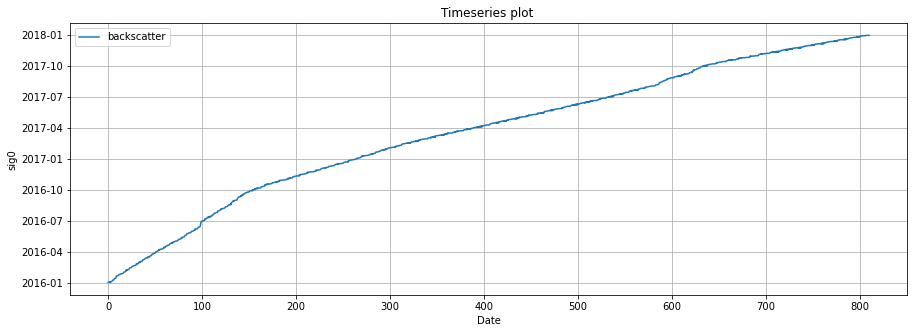

In [127]:
# test plot
plt.figure(figsize=(15, 5))
plt.title('Timeseries plot ')
plt.plot(sig0_cube['dtime_1'], label='backscatter')   #missing correct y data. y data must be 'filtered'. but filtering gives error
plt.xlabel('Date')
plt.ylabel('sig0')
plt.grid()
plt.legend()
plt.show()

--------
## Tests: Filtering the datacube by Geometry


### Case A: By points

- will use 'datacube.filter_spatially_by_geom(point, sref=sref)'

In [122]:


#filter by geometry:  -point or bbox


#sample point
filtered_by_point = sig0_cube.filter_spatially_by_geom(point, sref=sref)

#sample box
# bbox_inside = [(34.64454444444444, -20.56446111111111), (34.64833055555555, -20.567194444444443)]  # [(x_min, y_min), (x_max, y_max)]
# filtered_by_bbox = sig0_cube.filter_spatially_by_geom(bbox_inside, sref=sref)
# print(f"Number of filtered files with a bbox located inside the data tiles: {len(filtered_by_bbox)}")


C:\Users\carellan\Miniconda3\envs\yeoda_test3\lib\site-packages\geospade\crs.py:527: UserWarning: Conversion from 'PROJ4' to 'EPSG' is not possible.
  warnings.warn(warn_msg.format(self._sref_type.upper(), tar_sref_type.upper()))


KeyError: 'search_tiles_over_geometry'

In [113]:
# test code:   ==ignore==

# # Define OGRpoint from shapefile 
# # read a shapefile
# sofala_min = r"C:\Users\carellan\Documents\GitHub\GEO-TUW\exports\Sofala_shp\Sofala-Min.shp"
# #  "type": "Point", "coordinates": [ 34.646225, -20.565807

# # get shapefile field and types
# dataSource = ogr.Open(sofala_min)
# daLayer = dataSource.GetLayer(0)
# layerDefinition = daLayer.GetLayerDefn()
# print("Name  -  Type  Width  Precision")
# for i in range(layerDefinition.GetFieldCount()):
#     fieldName =  layerDefinition.GetFieldDefn(i).GetName()
#     fieldTypeCode = layerDefinition.GetFieldDefn(i).GetType()
#     fieldType = layerDefinition.GetFieldDefn(i).GetFieldTypeName(fieldTypeCode)
#     fieldWidth = layerDefinition.GetFieldDefn(i).GetWidth()
#     GetPrecision = layerDefinition.GetFieldDefn(i).GetPrecision()

#     print(fieldName + " - " + fieldType+ " " + str(fieldWidth) + " " + str(GetPrecision))

In [81]:
#output ogrpoint
point.GetX() , point.GetY()

(34.646225, -20.565807)

### Case B: By polygon

In [123]:
# try polygon

#split datacube monthly
months = sig0_cube.split_monthly()


# import matplotlib.pyplot as plt

polygon = [(34.64454444444444,-20.56446111111111), (34.644666666666666,-20.56717777777778), (34.64829722222222,-20.564325),
           (34.64833055555555,-20.567194444444443)]
february_vv = months[0].filter_by_dimension(['VV'], name="pol")  # datatype: yeoda.datacube.EODataCube
masked_xarray = february_vv.load_by_geom(polygon, sref=sref, apply_mask=True)

plt.figure(figsize=(15, 5))
plt.title("Polygon cutout of sigma nought monthly means")
# the '1' indices the first band in our monlth means backscatter GeoTIFF files
plt.imshow(masked_xarray['1'].data[0, ...], cmap=plt.cm.Greys_r)


AttributeError: 'str' object has no attribute 'osr_spref'